In [2]:
import pandas as pd

# Series

In [3]:
pd.Series(["Julie", "René", "Corentin"])

0       Julie
1        René
2    Corentin
dtype: object

In [5]:
serie = pd.Series(["Julie", "René", "Corentin"], index=["étudiant1", "étudiant2", "étudiant3"])

In [6]:
serie.index

Index(['étudiant1', 'étudiant2', 'étudiant3'], dtype='object')

In [7]:
serie["étudiant1"]

'Julie'

* il est possible d ajouter une cellule clef:valeur

In [31]:
serie2 = pd.Series({"name1": 1, "name2": 2, "name3": 3})

In [34]:
is_inf = (serie2 > 1) & (serie2 < 3)

In [35]:
serie2[is_inf]

name2    2
dtype: int64

In [41]:
serie2.loc[["name1", "name3"]] #inclu

name1    1
name3    3
dtype: int64

In [42]:
serie2.iloc[0:2] #exclu

name1    1
name2    2
dtype: int64

# DataFrame

* sequence de Series "alignés"

* chaque Series est une colonne
* pd.DataFrame() est le constructor de la class
* index sur les rows, index sur les colonnes
* cela rssemble à SQL ou Excel

In [47]:
df = pd.DataFrame({
                "age": pd.Series([18,25,45,36]),
                "nom": pd.Series(["Julien", "Corentin", "Seb", "Lucas"])
             })

In [48]:
df.columns

Index(['age', 'nom'], dtype='object')

In [50]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [51]:
df

,age,nom
0,18,Julien
1,25,Corentin
2,45,Seb
3,36,Lucas


In [52]:
df.shape

(4, 2)

In [53]:
df["age"]

0    18
1    25
2    45
3    36
Name: age, dtype: int64

In [54]:
df.age # peu recommandé

0    18
1    25
2    45
3    36
Name: age, dtype: int64

In [55]:
df["nbr_child"] = 1

In [56]:
df.shape

(4, 3)

In [57]:
df

,age,nom,nbr_child
0,18,Julien,1
1,25,Corentin,1
2,45,Seb,1
3,36,Lucas,1


In [58]:
import numpy as np
df["nbr_child"] = np.exp(df["nbr_child"])

In [59]:
df

,age,nom,nbr_child
0,18,Julien,2.718282
1,25,Corentin,2.718282
2,45,Seb,2.718282
3,36,Lucas,2.718282


In [60]:
df2 = pd.DataFrame({
                "nbr_child": pd.Series(2.718282)
             })

In [61]:
df2

,nbr_child
0,2.718282


In [62]:
df + df2

,age,nbr_child,nom
0,NaN,5.436564,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN


In [67]:
df3 = pd.DataFrame(np.random.randint(0, 10, (3, 4)))

In [68]:
df3

,0,1,2,3
0,4,3,8,5
1,5,4,3,5
2,0,6,6,1


In [69]:
df2 + df3

,nbr_child,0,1,2,3
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN


In [71]:
df4 = df3.sample(3)

In [72]:
df4

,0,1,2,3
0,4,3,8,5
1,5,4,3,5
2,0,6,6,1


In [73]:
df3 + df4

,0,1,2,3
0,8,6,16,10
1,10,8,6,10
2,0,12,12,2


##### toutes les operations alignent les index
##### Selection  iloc & loc

In [74]:
df["age"] > 3

0    True
1    True
2    True
3    True
Name: age, dtype: bool

In [75]:
df.loc[df["age"] > 3, "nom"]

0      Julien
1    Corentin
2         Seb
3       Lucas
Name: nom, dtype: object

In [78]:
df.loc[(df["age"] > 3) & (df["nom"] == "Julien" ) | (df["nom"] == "Corentin" )]

,age,nom,nbr_child
0,18,Julien,2.718282
1,25,Corentin,2.718282


In [79]:
df.dtypes

age            int64
nom           object
nbr_child    float64
dtype: object

In [81]:
df

,age,nom,nbr_child
0,18,Julien,2.718282
1,25,Corentin,2.718282
2,45,Seb,2.718282
3,36,Lucas,2.718282


* dataFrame().dropna(axis=0) supprimer les lignes avec les valeurs manquantes
* how="all" pour une ligne qui a toutes la valeurs des colonnes manquantes
* thresh=2 au moins deux valeurs manquantes par ligne
* tresh=0.30*df.shape[0] 30% des valeurs contenu dans l index 0

* df.fillna(value=0) valeur manquant deviennent 0
* possible de rajouter axis
* method="bfill" remplir les observations d avant

In [85]:
pd.concat([df, df2]).reset_index(drop=True)

,age,nom,nbr_child
0,18.0,Julien,2.718282
1,25.0,Corentin,2.718282
2,45.0,Seb,2.718282
3,36.0,Lucas,2.718282
4,NaN,NaN,2.718282


In [86]:
pd.concat([df, df2], axis=1)

,age,nom,nbr_child,nbr_child
0,18,Julien,2.718282,2.718282
1,25,Corentin,2.718282,NaN
2,45,Seb,2.718282,NaN
3,36,Lucas,2.718282,NaN


In [87]:
pd.concat([df, df2])

,age,nom,nbr_child
0,18.0,Julien,2.718282
1,25.0,Corentin,2.718282
2,45.0,Seb,2.718282
3,36.0,Lucas,2.718282
0,NaN,NaN,2.718282


In [88]:
pd.concat([df, df2], axis=1, keys=["source1", "source2"])

source1                       source2
      age       nom nbr_child nbr_child
0      18    Julien  2.718282  2.718282
1      25  Corentin  2.718282       NaN
2      45       Seb  2.718282       NaN
3      36     Lucas  2.718282       NaN

* merge/join deux DataFrame => pd.merge(left=df1, right=df2, how='inner', left_on='colmun_name', sufixes=[df])
* var_merge.drop(df, axis=1, inplace=True) pour remove les infos en trop

In [90]:
!curl https://raw.githubusercontent.com/Luc-Bertin/TDs_ESILV/master/td3_discover_pandas/notes_eleves.csv -o "notes.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21979  100 21979    0     0  39607      0 --:--:-- --:--:-- --:--:-- 39673


In [92]:
import os

In [93]:
!ls

Mes_exercices_td.ipynb     monenv
Mon_premier_notebook.ipynb notes.csv
Panda.ipynb                requirements.txt
README.md


In [96]:
df_notes = pd.read_csv('./notes.csv', encoding='utf8', index_col=0)

In [97]:
df_notes.columns

Index(['eleve', 'note', 'groupe', 'quizz'], dtype='object')

In [98]:
df_notes.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            736, 737, 738, 739, 740, 741, 742, 743, 744, 745],
           dtype='int64', length=746)

In [99]:
df_notes.head(4)

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
1,eleve1,100 %,Unknown,td1
2,eleve4,"71,43 %",Unknown,td1
3,eleve6,"42,86 %",Unknown,td1


In [101]:
# Les 4 dernières données
df_notes.tail(4)

,eleve,note,groupe,quizz
742,eleve166,"66,67 %",ibo5,td3
743,eleve176,"83,33 %",ibo5,td3
744,eleve186,100 %,ibo5,td3
745,eleve196,"66,67 %",ibo5,td3


In [102]:
2 * df_notes['eleve']

0          eleve0eleve0
1          eleve1eleve1
2          eleve4eleve4
3          eleve6eleve6
4          eleve8eleve8
             ...       
741    eleve174eleve174
742    eleve166eleve166
743    eleve176eleve176
744    eleve186eleve186
745    eleve196eleve196
Name: eleve, Length: 746, dtype: object

In [103]:
def function (val):
    return val*2

In [104]:
df_notes.eleve.apply(function)

0          eleve0eleve0
1          eleve1eleve1
2          eleve4eleve4
3          eleve6eleve6
4          eleve8eleve8
             ...       
741    eleve174eleve174
742    eleve166eleve166
743    eleve176eleve176
744    eleve186eleve186
745    eleve196eleve196
Name: eleve, Length: 746, dtype: object

In [105]:
df_notes.sort_values('eleve')

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
444,eleve0,80 %,ibo2,td2
691,eleve0,100 %,ibo2,td3
445,eleve1,100 %,ibo2,td2
692,eleve1,100 %,ibo2,td3
...,...,...,...,...
615,eleve98,100 %,ibo4,td2
45,eleve98,"42,86 %",Unknown,td1
704,eleve99,100 %,ibo2,td3
46,eleve99,"71,43 %",Unknown,td1


In [106]:
df_notes.count()

eleve     746
note      746
groupe    746
quizz     746
dtype: int64

In [119]:
def func2 (row):
    if row["groupe"] == "ibo2":
        if row["quizz"] == "td2":
            return "Note annulé"
        else:
            return "Note conservé"
    return "Note conservé"

In [120]:
df_notes.apply(func2, axis=1)

0      Note conservé
1      Note conservé
2      Note conservé
3      Note conservé
4      Note conservé
           ...      
741    Note conservé
742    Note conservé
743    Note conservé
744    Note conservé
745    Note conservé
Length: 746, dtype: object

# STR vectorized manipulation
donne toutes les methodes str (ex: capitalize())

In [130]:
df_notes.eleve.str.capitalize()

0        Eleve0
1        Eleve1
2        Eleve4
3        Eleve6
4        Eleve8
         ...   
741    Eleve174
742    Eleve166
743    Eleve176
744    Eleve186
745    Eleve196
Name: eleve, Length: 746, dtype: object

In [131]:
df_notes.note.str.startswith("eleve")

0      False
1      False
2      False
3      False
4      False
       ...  
741    False
742    False
743    False
744    False
745    False
Name: note, Length: 746, dtype: bool

In [132]:
df_notes.note.str.split(",")

0      [71, 43 %]
1         [100 %]
2      [71, 43 %]
3      [42, 86 %]
4      [57, 14 %]
          ...    
741       [100 %]
742    [66, 67 %]
743    [83, 33 %]
744       [100 %]
745    [66, 67 %]
Name: note, Length: 746, dtype: object

In [136]:
(df_notes.note
     .str
     .replace(",", '.')
     .str.replace('%', '')
     .astype(float)
)

0       71.43
1      100.00
2       71.43
3       42.86
4       57.14
        ...  
741    100.00
742     66.67
743     83.33
744    100.00
745     66.67
Name: note, Length: 746, dtype: float64

In [141]:
(df_notes.note
     .str.findall('(\d+),?(\d+)?')
     .str[0]
     .str.join(".")
     .str.strip('.')
)

0      71.43
1        100
2      71.43
3      42.86
4      57.14
       ...  
741      100
742    66.67
743    83.33
744      100
745    66.67
Name: note, Length: 746, dtype: object

In [143]:
df_notes.groupe.value_counts(ascending=True)

ibo2        57
ibo4        81
ibo6        85
ibo3        85
Unknown     92
ibo7       114
ibo5       115
ibo1       117
Name: groupe, dtype: int64

* df_notes["intervalle"] = pd.cut(df_notes.note, bins=[0, 50, 75, 100], labels=["bad", "moyen", "bon"]) donne des tranches avec des etiquettes

# GroupBy

In [147]:
df_notes

,eleve,note,groupe,quizz
0,eleve0,"71,43 %",Unknown,td1
1,eleve1,100 %,Unknown,td1
2,eleve4,"71,43 %",Unknown,td1
3,eleve6,"42,86 %",Unknown,td1
4,eleve8,"57,14 %",Unknown,td1
...,...,...,...,...
741,eleve174,100 %,ibo5,td3
742,eleve166,"66,67 %",ibo5,td3
743,eleve176,"83,33 %",ibo5,td3
744,eleve186,100 %,ibo5,td3


In [155]:
for name, group in df_notes.groupby(['groupe', 'quizz']):
    print("nom {}, shape {}".format(name, group.shape))

nom ('Unknown', 'td1'), shape (92, 4)
nom ('ibo1', 'td1'), shape (30, 4)
nom ('ibo1', 'td2'), shape (30, 4)
nom ('ibo1', 'td3'), shape (27, 4)
nom ('ibo1', 'td4'), shape (30, 4)
nom ('ibo2', 'td2'), shape (30, 4)
nom ('ibo2', 'td3'), shape (27, 4)
nom ('ibo3', 'td2'), shape (30, 4)
nom ('ibo3', 'td3'), shape (27, 4)
nom ('ibo3', 'td4'), shape (28, 4)
nom ('ibo4', 'td2'), shape (27, 4)
nom ('ibo4', 'td3'), shape (28, 4)
nom ('ibo4', 'td4'), shape (26, 4)
nom ('ibo5', 'td1'), shape (27, 4)
nom ('ibo5', 'td2'), shape (30, 4)
nom ('ibo5', 'td3'), shape (28, 4)
nom ('ibo5', 'td4'), shape (30, 4)
nom ('ibo6', 'td2'), shape (29, 4)
nom ('ibo6', 'td3'), shape (28, 4)
nom ('ibo6', 'td4'), shape (28, 4)
nom ('ibo7', 'td1'), shape (29, 4)
nom ('ibo7', 'td2'), shape (28, 4)
nom ('ibo7', 'td3'), shape (28, 4)
nom ('ibo7', 'td4'), shape (29, 4)


* df_notes.groupby('groupe')["note"].mean() pourcentage en fonction de chacun des groupes
* si je rajoute .unstack(level=0) choisit l affichage des colonnes selon le trie 
* df_notes.groupe.replace('unknown', np.NaN, inplace=True)
* groupby avec transform permet d appliquer pour pas reduire toute la donnée
* bfill remplit val manquante a partir de celle suivante
* ffill sens inverse

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

* %matplotlib inline

In [6]:
df = pd.DataFrame({
                "age": pd.Series([18,25,45,36]),
                "nom": pd.Series(["Julien", "Corentin", "Seb", "Lucas"])
             })

<AxesSubplot:>

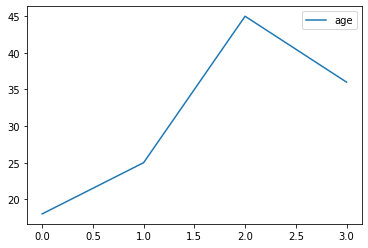

In [7]:
df.plot()

* scatter

<AxesSubplot:>

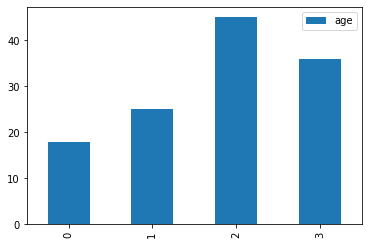

In [9]:
df.plot(kind='bar')

nom
Corentin    AxesSubplot(0.125,0.125;0.775x0.755)
Julien      AxesSubplot(0.125,0.125;0.775x0.755)
Lucas       AxesSubplot(0.125,0.125;0.775x0.755)
Seb         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

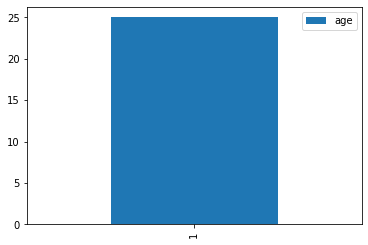

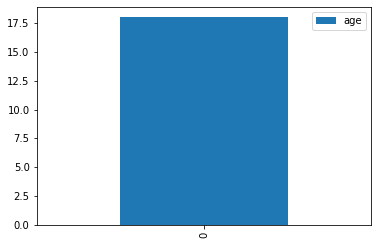

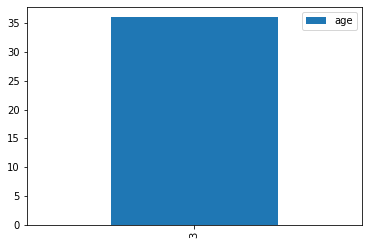

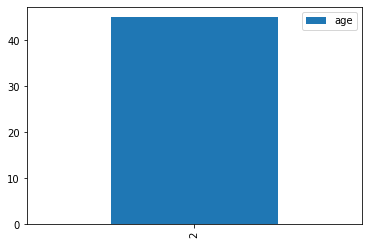

In [13]:
df.groupby("nom").plot(kind='bar', stacked=True)

<AxesSubplot:>

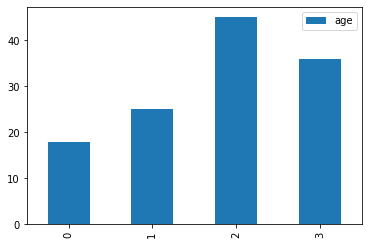

In [14]:
df.plot(kind='bar', stacked=True)

nom
Corentin    AxesSubplot(0.125,0.125;0.775x0.755)
Julien      AxesSubplot(0.125,0.125;0.775x0.755)
Lucas       AxesSubplot(0.125,0.125;0.775x0.755)
Seb         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

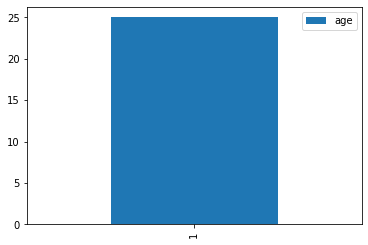

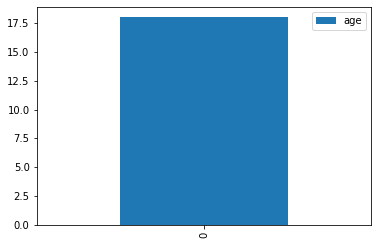

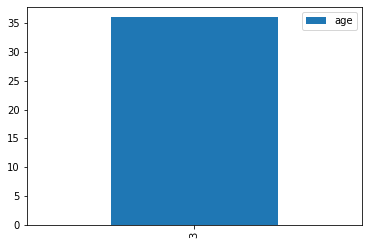

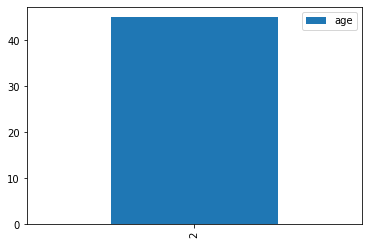

In [15]:
df.groupby("nom").plot(kind='bar')

<AxesSubplot:>

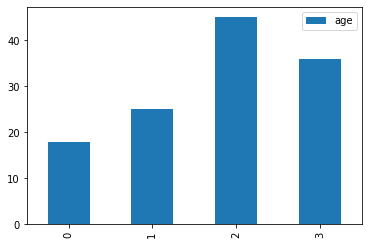

In [16]:
df.plot(kind='bar')

<AxesSubplot:>

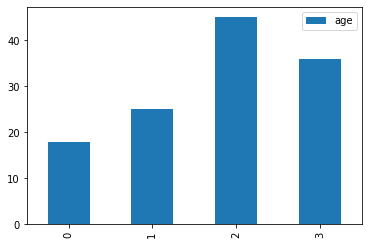

In [17]:
df.plot(kind='bar', stacked=True)